In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict
from raw_data import public_train_data, public_test_data
from raw_data import private_train_data, private_test_data


In [3]:
public_data = public_train_data(rootdir='../Data/Public/train')
private_data = private_train_data(rootdir='../Data/Private/train/')

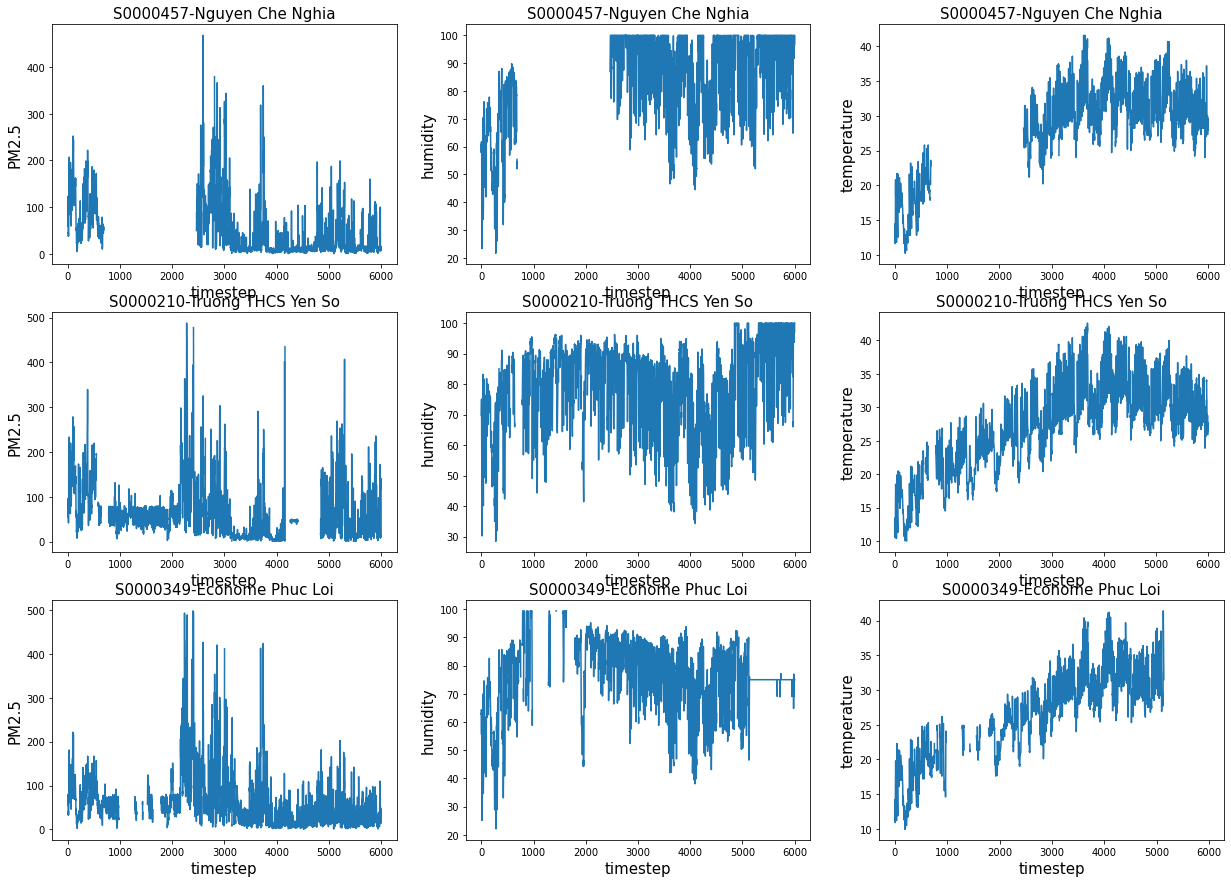

In [4]:
def visualize_data(data: Dict, n_stations: int = 3,
                   features=['PM2.5', 'humidity', 'temperature']):
    rows = n_stations
    cols = len(features)

    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows))

    for i in range(rows):
        station_name = list(data.keys())[i]
        station_data = data[station_name]['data']
        for j in range(cols):
            feature = features[j]

            axes[i][j].plot(station_data[feature])
            axes[i][j].set_title(station_name, fontsize=15)
            axes[i][j].set_xlabel('timestep', fontsize=15)
            axes[i][j].set_ylabel(feature, fontsize=15)


visualize_data(private_data['air'])


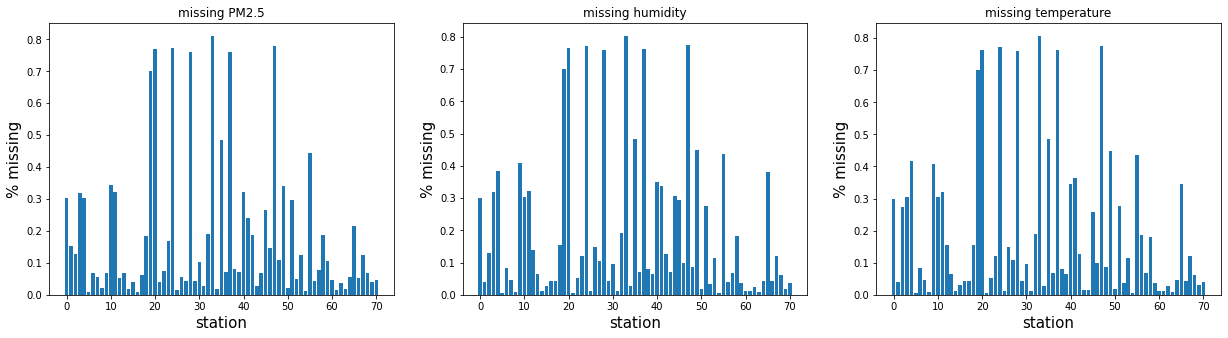

In [94]:
def visualize_missing_data(data: Dict, features=['PM2.5', 'humidity', 'temperature']):
    rows = 1
    cols = len(features)
    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5))

    for i in range(cols):
        missing = []
        feature = features[i]
        for station_name in data:
            data_feature = data[station_name]['data'][feature]
            total = len(data_feature)
            n_missing = len(data_feature[data_feature.isna()])
            missing.append(n_missing/total)

        axes[i].bar([i for i in range(len(data))], missing)
        axes[i].set_title('missing ' + feature)
        axes[i].set_xlabel('station', fontsize=15)
        axes[i].set_ylabel('% missing', fontsize=15)


visualize_missing_data(private_data['air'])


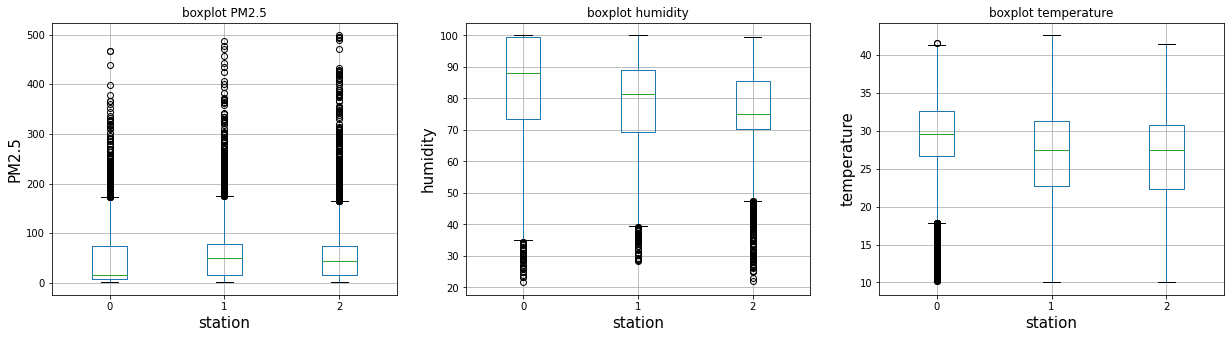

In [5]:
def visualize_boxplot(data: Dict, n_stations: int = 3,
                      features=['PM2.5', 'humidity', 'temperature']):
    rows = 1
    cols = len(features)
    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5))

    for i in range(cols):
        feature = features[i]
        data_feature = {}

        for j in range(n_stations):
            station_name = list(data.keys())[j]
            data_feature[j] = data[station_name]['data'][feature]

        data_feature = pd.DataFrame(data_feature)
        data_feature.boxplot(ax=axes[i])

        axes[i].set_title('boxplot ' + feature)
        axes[i].set_xlabel('station', fontsize=15)
        axes[i].set_ylabel(feature, fontsize=15)


visualize_boxplot(private_data['air'])


In [38]:
def visualize_correlation_features(data: Dict, features=['PM2.5', 'humidity']):
    pearson = []
    spearman = []
    for station_name in data:
        data_station = data[station_name]['data']
        data_feature = {
            features[0]: data_station[features[0]],
            features[1]: data_station[features[1]],
        }
        data_feature = pd.DataFrame(data_feature)
        pearson.append(data_feature.corr('pearson')[features[0]][features[1]])
        spearman.append(data_feature.corr('spearman')[features[0]][features[1]])

    rows = 1
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5))

    axes[0].bar([i for i in range(71)], pearson)
    axes[0].set_title('{} and {}'.format(features[0], features[1]), fontsize=15)
    axes[0].set_xlabel('station', fontsize=15)
    axes[0].set_ylabel('pearson', fontsize=15)

    axes[1].bar([i for i in range(71)], spearman)
    axes[1].set_title('{} and {}'.format(features[0], features[1]), fontsize=15)
    axes[1].set_xlabel('station', fontsize=15)
    axes[1].set_ylabel('spearman', fontsize=15)

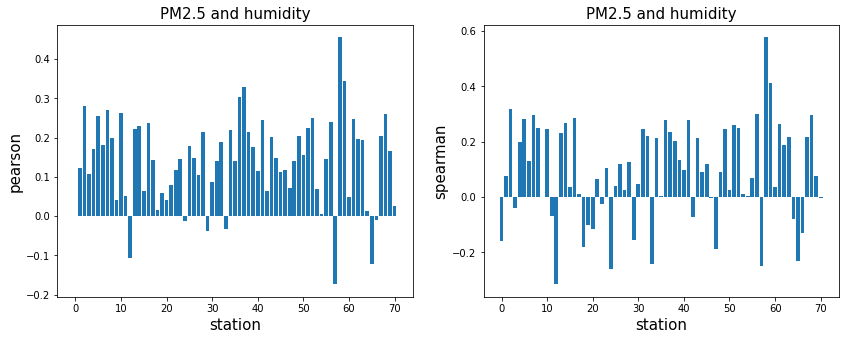

In [39]:
visualize_correlation_features(private_data['air'])

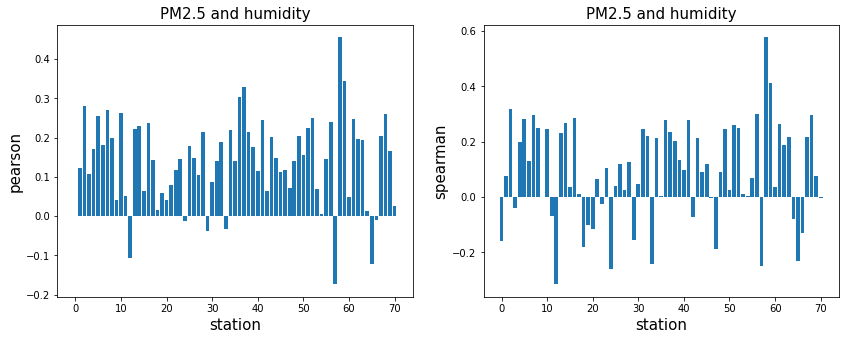

In [40]:
visualize_correlation_features(private_data['air'])

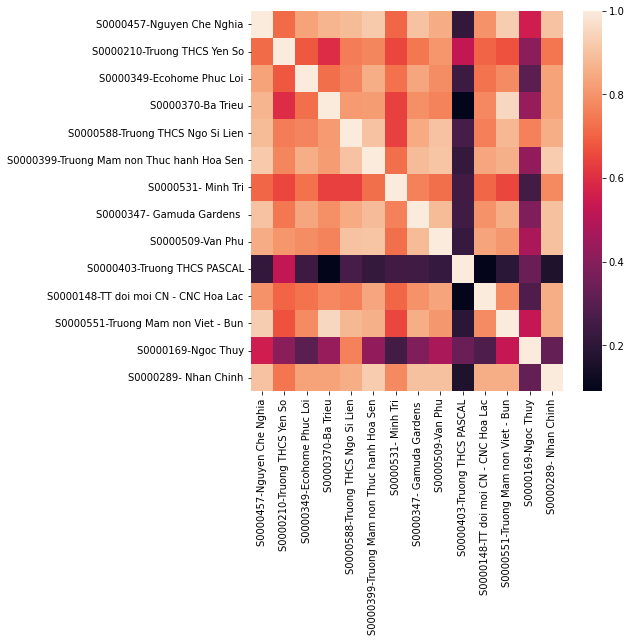

In [83]:
def show_correlation_stations(data: Dict, n_station: int = 14, feature: str = 'PM2.5'):
    data_feature = {}

    stations = list(data.keys())
    for i in range(n_station):
        station_name = stations[i]
        data_feature[station_name] = data[station_name]['data'][feature] 

    data_feature = pd.DataFrame(data_feature)
    pearson = data_feature.corr()

    fig, ax = plt.subplots(figsize = (0.5*n_station, 0.5*n_station))
    sns.heatmap(pearson, ax=ax) 

show_correlation_stations(private_data['air'])